In [1]:
pwd

'/gpfs/alpine/bif135/proj-shared/rbd_work/dask_testing/Min_and_analysis/as_clean_as_it_gets'

In [22]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import cm
import numpy as np

In [77]:
with open('results_dictionary.pkl','rb') as in_pickle:
    results_dict = pickle.load(in_pickle)
print(results_dict['subset2_08nodes'].keys())
print(results_dict['subset2_08nodes']['stop_overhead'])
#print(np.mean(results_dict['subset2_08nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_08nodes']['client_start_overhead'][0]))

dict_keys(['batch_start', 'batch_end', 'client_start', 'client_end', 'total_time', 'client_start_overhead', 'worker_between_overhead', 'worker_idle_times', 'stop_overhead'])
6.236667156219482


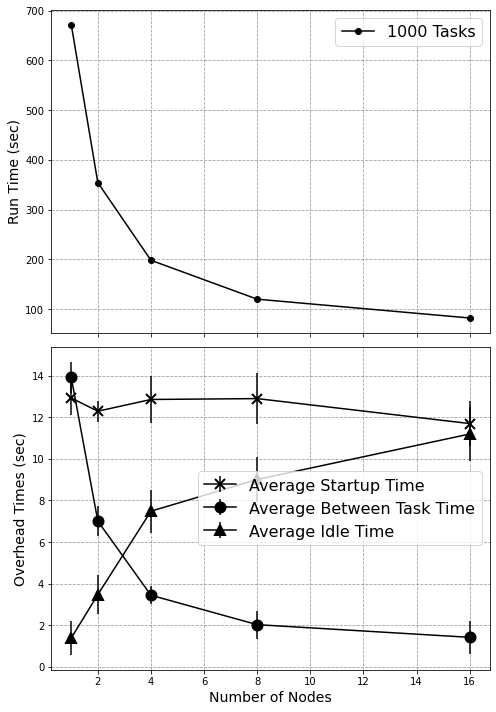

In [90]:
fig, axs = plt.subplots(2, 1, figsize=(7, 10),sharex=True)

# strong scaling image:
timing = np.array([[1,results_dict['subset2_01nodes']['total_time']],
                  [2,results_dict['subset2_02nodes']['total_time']],
                  [4,results_dict['subset2_04nodes']['total_time']],
                  [8,results_dict['subset2_08nodes']['total_time']],
                  [16,results_dict['subset2_16nodes']['total_time']]])

axs[0].plot(timing[:,0],timing[:,1],'ko-',zorder=3, label = '1000 Tasks')

# overhead plots
#timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_01nodes']['client_start_overhead'][0])],
#                   [2,np.mean(results_dict['subset2_02nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_02nodes']['client_start_overhead'][0])],
#                   [4,np.mean(results_dict['subset2_04nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_04nodes']['client_start_overhead'][0])],
#                   [8,np.mean(results_dict['subset2_08nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_08nodes']['client_start_overhead'][0])],
#                   [16,np.mean(results_dict['subset2_16nodes']['client_start_overhead'][0]),np.std(results_dict['subset2_16nodes']['client_start_overhead'][0])]])
#axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='b',marker='x',ms=10,mew=2,ecolor='b',zorder=3, label = 'Average Startup Time')

timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_01nodes']['client_start_overhead'][1])],
                   [2,np.mean(results_dict['subset2_02nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_02nodes']['client_start_overhead'][1])],
                   [4,np.mean(results_dict['subset2_04nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_04nodes']['client_start_overhead'][1])],
                   [8,np.mean(results_dict['subset2_08nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_08nodes']['client_start_overhead'][1])],
                   [16,np.mean(results_dict['subset2_16nodes']['client_start_overhead'][1]),np.std(results_dict['subset2_16nodes']['client_start_overhead'][1])]])
axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='k',marker='x',ms=10,mew=2,ecolor='k',zorder=3, label = 'Average Startup Time')

#timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_01nodes']['worker_between_overhead'][0])],
#                   [2,np.mean(results_dict['subset2_02nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_02nodes']['worker_between_overhead'][0])],
#                   [4,np.mean(results_dict['subset2_04nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_04nodes']['worker_between_overhead'][0])],
#                   [8,np.mean(results_dict['subset2_08nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_08nodes']['worker_between_overhead'][0])],
#                   [16,np.mean(results_dict['subset2_16nodes']['worker_between_overhead'][0]),np.std(results_dict['subset2_16nodes']['worker_between_overhead'][0])]])
## CPU workers are idle for the majority of the job; can have a large mean "total between-task time".
#axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='b',marker='o',ms=10,mew=2,ecolor='b',zorder=3, label = 'Average Between Task Time')

timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_01nodes']['worker_between_overhead'][1])],
                   [2,np.mean(results_dict['subset2_02nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_02nodes']['worker_between_overhead'][1])],
                   [4,np.mean(results_dict['subset2_04nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_04nodes']['worker_between_overhead'][1])],
                   [8,np.mean(results_dict['subset2_08nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_08nodes']['worker_between_overhead'][1])],
                   [16,np.mean(results_dict['subset2_16nodes']['worker_between_overhead'][1]),np.std(results_dict['subset2_16nodes']['worker_between_overhead'][1])]])
# GPU workers are very rarely idle; small mean "total between-task time".
axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='k',marker='o',ms=10,mew=2,ecolor='k',zorder=3, label = 'Average Between Task Time')

#timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_01nodes']['worker_idle_times'][0])],
#                   [2,np.mean(results_dict['subset2_02nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_02nodes']['worker_idle_times'][0])],
#                   [4,np.mean(results_dict['subset2_04nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_04nodes']['worker_idle_times'][0])],
#                   [8,np.mean(results_dict['subset2_08nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_08nodes']['worker_idle_times'][0])],
#                   [16,np.mean(results_dict['subset2_16nodes']['worker_idle_times'][0]),np.std(results_dict['subset2_16nodes']['worker_idle_times'][0])]])
## CPU workers are idle for the majority of the job; can have a large mean "total between-task time".
#axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='b',marker='^',ms=10,mew=2,ecolor='b',zorder=3, label = 'Average Idle Time')

timing = np.array([[1,np.mean(results_dict['subset2_01nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_01nodes']['worker_idle_times'][1])],
                   [2,np.mean(results_dict['subset2_02nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_02nodes']['worker_idle_times'][1])],
                   [4,np.mean(results_dict['subset2_04nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_04nodes']['worker_idle_times'][1])],
                   [8,np.mean(results_dict['subset2_08nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_08nodes']['worker_idle_times'][1])],
                   [16,np.mean(results_dict['subset2_16nodes']['worker_idle_times'][1]),np.std(results_dict['subset2_16nodes']['worker_idle_times'][1])]])
axs[1].errorbar(timing[:,0],timing[:,1],yerr = timing[:,2],c='k',marker='^',ms=10,mew=2,ecolor='k',zorder=3, label = 'Average Idle Time')

# labels
axs[0].set_ylabel('Run Time (sec)',size=14)
axs[1].set_ylabel('Overhead Times (sec)',size=14)
axs[1].set_xlabel('Number of Nodes',size=14)

axs[0].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
axs[1].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
#axs[2].grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
plt.tight_layout()
plt.savefig(f'scaling_and_overheads.png',dpi=600,transparent=True)
plt.show()
plt.close()